Name: Can Şentürk, Student ID: 2492102. Project for Introduction to Data Science (DS 701)

PART I

[1]. Import the Mnist dataset. Imported MNIST dataset with Keras.
Used concatenate to merge train and test sets because with Keras, dataset can only be imported with a test train split as its described on the offical documents at the link. https://keras.io/api/datasets/mnist/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_ds = np.concatenate((x_train, x_test))
y_ds = np.concatenate((y_train, y_test))

[2]. Use plt.figure(figsize= (5,5)) and show 12 numbers using three rows and four columns.
For loop used in order to go through first 12 images on the dataset.

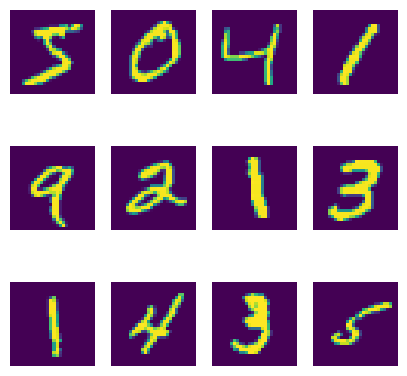

In [ ]:
plt.figure(figsize= (5,5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    image = x_ds[i]
    plt.imshow(image)
    plt.axis('off')
plt.show()
plt.close('all')

[3]. Preprocess and scale the data.
Reshaped the images to 1D arrays for our model to read. Images are originally 28x28 pixels. Images converted from 28x28 2d arrays to 784 1d arrays. Converted integers to floats. And then Scaled the pixel values from 0-255 (gray scale values) to 0-1.

In [ ]:
print(x_ds.shape)

x_ds = x_ds.reshape(x_ds.shape[0], np.prod(x_ds.shape[1:]))
print(x_ds.shape)

x_ds = x_ds.astype('float32')

x_ds = x_ds / 255.0

(70000, 28, 28)
(70000, 784)


[4]. Create the model summary.
Created a fully connected artificial neural network with 3 hidden layers these have 64, 32, 10 neurons 1 input layer with 784 inputs and an output layer with 10 outputs. And created a summary also showing the parameter counts.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model= Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,928 (101.28 KB)

 Trainable params: 25,928 (101.28 KB)

 Non-trainable params: 0 (0.00 B)

[5]. Do Test Train Split.
Did a 2 to 8 ratio test and train split.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_ds, y_ds, test_size=0.2, random_state=10, shuffle= True)

print(x_train.shape)
print(x_test.shape)

(56000, 784)
(14000, 784)


[6]. Compile the model.
Loss is neceserry, Adam is a good and modern optimizer, accuracy is a good metric to have.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

[7]. Fit the model.

In [ ]:
history = model.fit(x_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7564 - loss: 0.7671 - val_accuracy: 0.9305 - val_loss: 0.2459
Epoch 2/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9347 - loss: 0.2227 - val_accuracy: 0.9384 - val_loss: 0.2159
Epoch 3/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9505 - loss: 0.1639 - val_accuracy: 0.9399 - val_loss: 0.2095
Epoch 4/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9592 - loss: 0.1347 - val_accuracy: 0.9534 - val_loss: 0.1652
Epoch 5/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9646 - loss: 0.1216 - val_accuracy: 0.9546 - val_loss: 0.1556
Epoch 6/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.1058 - val_accuracy: 0.9521 - val_loss: 0.1653
Epoch 7/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9719 - loss: 0.0965 - val_accuracy: 0.9549 - val_loss: 0.1558
Epoch 8/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9743 - loss: 0.0839 - 

[8]. Evaluate model performance. Here is a training vs test accuracy over epochs graph to see if is there is a overfitting or underfitting problem. Also we got accuracy around %96 that shows the predicting power of our model.

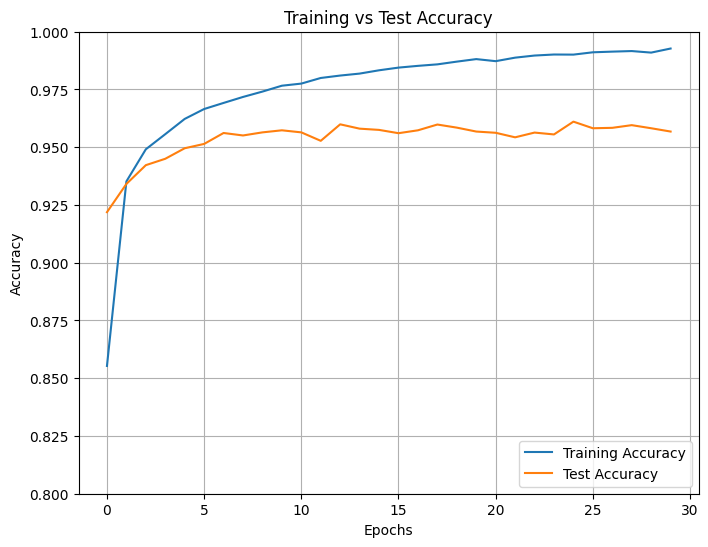

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy score is: 0.9610714285714286


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0.8, 1)
plt.show()

y_pred = model.predict(x_test).argmax(axis=1)
from sklearn.metrics import accuracy_score
print(f"Accuracy score is: {accuracy_score(y_test,y_pred)}")

PART II

[1]. Load the Iris Data from Seaborn.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
iris = sns.load_dataset("iris")

[2]. Show the first 5 rows of the dataset.

In [ ]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


[3]. Use df and describe the dataset.

In [ ]:
df = pd.DataFrame(iris)

print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


[4]. Print the information for the Iris dataset.

In [ ]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


[5]. Use iris.groupby and print the number of species and the datatype.

In [ ]:
iris.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50


[6]. Use Seaborn and create pair plots. Colours for diffrent species helps to undrestand the data.

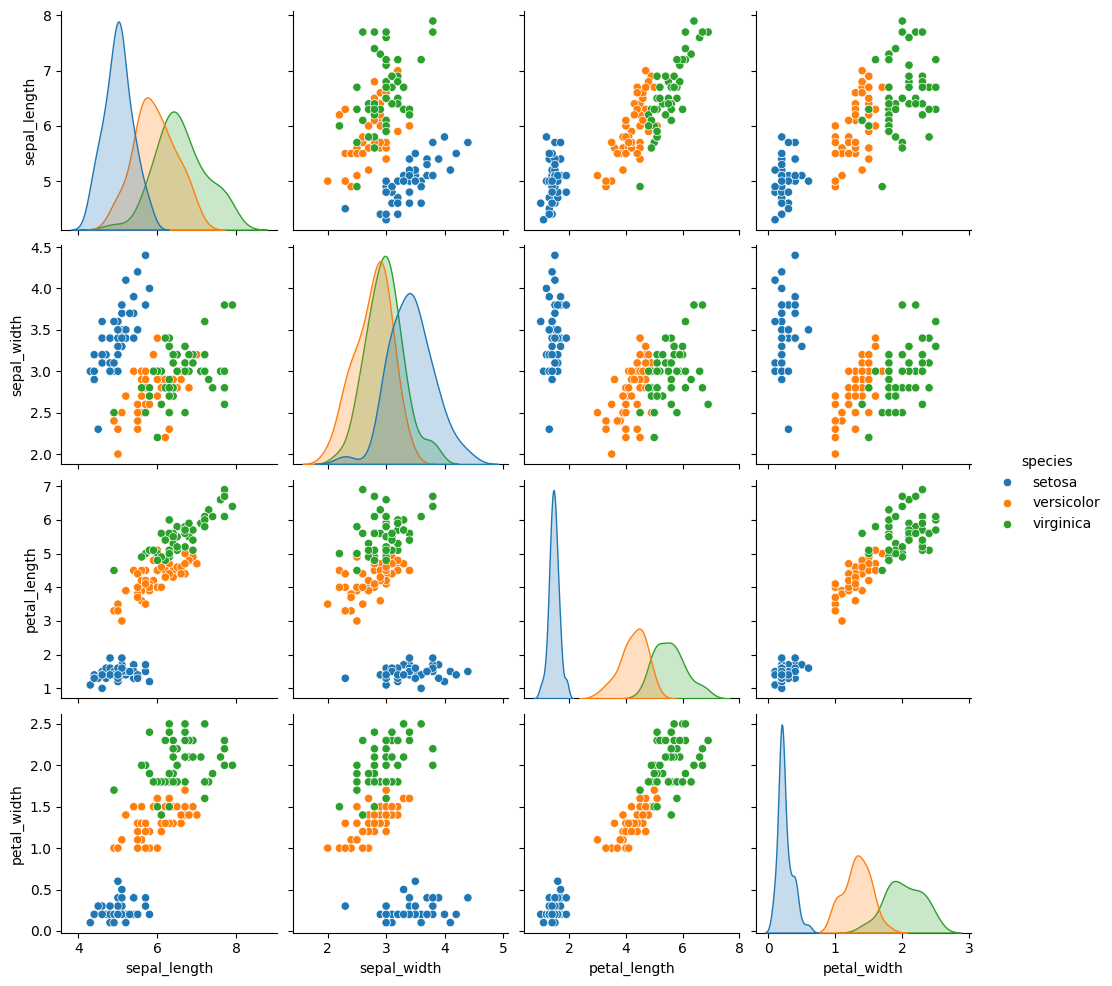

In [ ]:
sns.pairplot(data=iris, hue='species')

[7]. Show histograms for all the features.

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

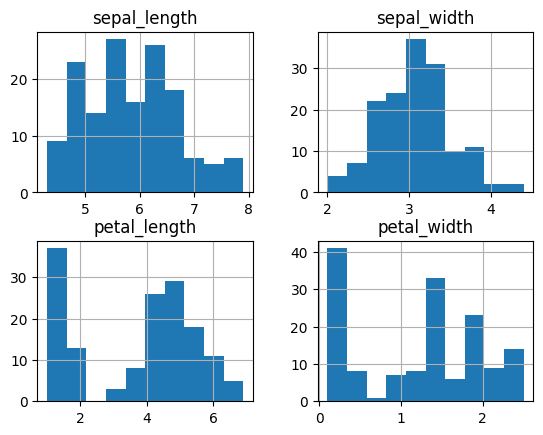

In [ ]:
iris.hist()

[8]. Show the boxplot grouped by species. used melt function to show all of the boxplots for diffrent features. This way we can use use all of the features on one plot. Unless we use melt function we can only use one feature.

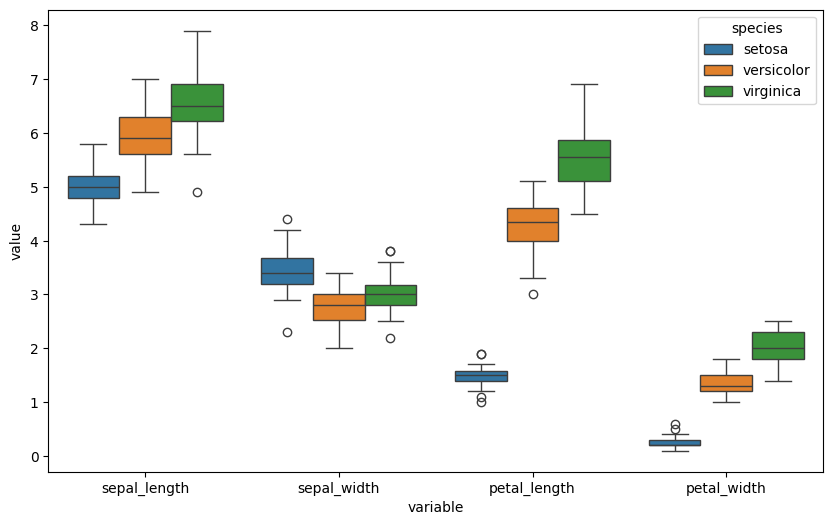

In [ ]:
iris_melted = iris.melt(id_vars="species", value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", hue="species", data=iris_melted)
plt.show()

[9]. Show the violin plot for the Iris dataset.

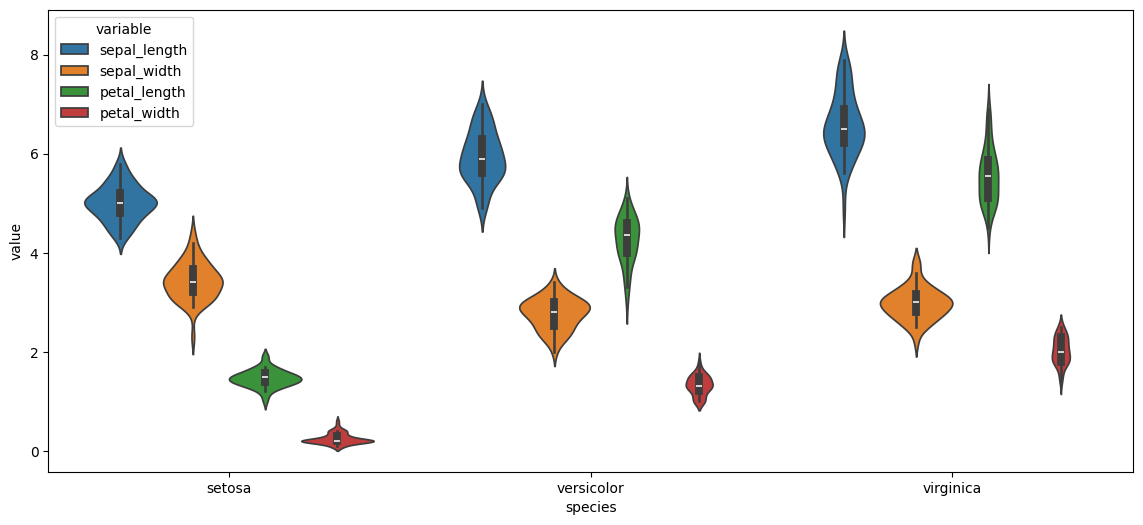

In [ ]:
iris_melted = iris.melt(id_vars="species", value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.figure(figsize=(14, 6))
sns.violinplot(x='species', y='value', hue='variable', data=iris_melted)
plt.show()